In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Outcome=1 Diabet/şeker Hastası
#Outcome=0 sağlıklı

seker_hastaları=data[data.Outcome==1]
saglıklı_ınsanlar=data[data.Outcome==0]

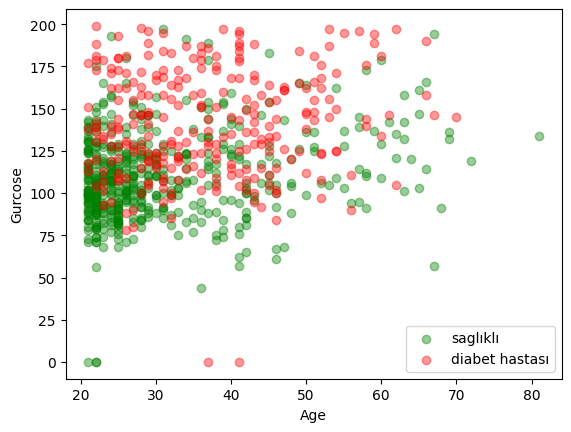

In [ ]:
#Glikoz değerleri için örnek bir plot çizelim

plt.scatter(saglıklı_ınsanlar.Age,saglıklı_ınsanlar.Glucose,color="green",label="saglıklı",alpha=0.4)
plt.scatter(seker_hastaları.Age,seker_hastaları.Glucose,color="red",label="diabet hastası",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Gurcose")
plt.legend()
plt.show()

In [ ]:
#burada x ve y eksenlerini belirliyoruz.Outcome sütününu çıkarıyoruz. çünkü knn sadece x değerleri içerisinde bir guruplandırma yapacak

y=data.Outcome.values
x_ham_veri=data.drop(["Outcome"],axis=1)

In [ ]:
#Normalizasyon işlemi

x=(x_ham_veri-np.min(x_ham_veri))/(np.max(x_ham_veri))-np.min(x_ham_veri)

In [ ]:
print("normalizasyon öncesi ham veriler :\n")
print(x_ham_veri.head())

normalizasyon öncesi ham veriler :

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
print("\n\n\nNormazlizasyon sonrası yapay zekaya eğitim için vereceğimiz verelier")
print(x.head())




Normazlizasyon sonrası yapay zekaya eğitim için vereceğimiz verelier
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.000000  0.027541   
3     0.001182  0.105201       0.078014       0.027187  0.111111  0.033215   
4     0.000000  0.161939       0.047281       0.041371  0.198582  0.050946   

   DiabetesPedigreeFunction       Age  
0                  0.000741  0.059102  
1                  0.000415  0.036643  
2                  0.000794  0.037825  
3                  0.000197  0.024823  
4                  0.002704  0.039007  


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)


In [ ]:
#KNN modeli oluşturma

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("k=3 için test verilerimizin doğrulama testi sonucu",knn.score(x_test,y_test))

k=3 için test verilerimizin doğrulama testi sonucu 0.7922077922077922


In [ ]:
#En iyi k değerini belirleme

sayac=1
for k in range(1,11):
  knn_yeni=KNeighborsClassifier(n_neighbors=k)
  knn_yeni.fit(x_train,y_train)
  print(sayac," ","doğruluk oranı :%",knn_yeni.score(x_test,y_test)*100)
  sayac+=1

1   doğruluk oranı :% 79.22077922077922
2   doğruluk oranı :% 74.02597402597402
3   doğruluk oranı :% 77.92207792207793
4   doğruluk oranı :% 74.02597402597402
5   doğruluk oranı :% 72.72727272727273
6   doğruluk oranı :% 75.32467532467533
7   doğruluk oranı :% 74.02597402597402
8   doğruluk oranı :% 76.62337662337663
9   doğruluk oranı :% 76.62337662337663
10   doğruluk oranı :% 76.62337662337663


In [ ]:
#yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler # daha hızlı normalizasyon yapmak için minmaxscaler kullanıldı
sc=MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction=knn.predict(sc.transform(np.array([[6,148,72,35,0,33,6,50]])))
new_prediction[0]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1